# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# importar librerías
import pandas as pd

In [2]:
# leer conjuntos de datos en los DataFrames
df_orders = pd.read_csv('instacart_orders.csv', sep=';', header=0)
df_products = pd.read_csv('products.csv', sep=';', header=0)
df_aisles = pd.read_csv('aisles.csv', sep=';', header=0)
df_departments = pd.read_csv('departments.csv', sep=';', header=0)
df_order_products = pd.read_csv('order_products.csv', sep=';', header=0)

In [3]:
# mostrar información del DataFrame
print("Información del DataFrame df_orders:")
print(df_orders.info())
display (df_orders.head(10))

Información del DataFrame df_orders:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
5,1843871,20084,5,0,11,15.0
6,2511640,148233,40,3,8,2.0
7,2521283,97711,2,0,18,22.0
8,2266494,34954,40,5,15,4.0
9,446014,15356,2,4,8,10.0


In [4]:
# mostrar información del DataFrame
print("Información del DataFrame df_products:")
print(df_products.info())
display(df_products.head(10))

Información del DataFrame df_products:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


In [5]:
# mostrar información del DataFrame
print("Información del DataFrame df_aisles:")
print(df_aisles.info())
display(df_aisles.head(10))

Información del DataFrame df_aisles:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
5,6,other
6,7,packaged meat
7,8,bakery desserts
8,9,pasta sauce
9,10,kitchen supplies


In [6]:
# mostrar información del DataFrame
print("Información del DataFrame df_departments:")
print(df_departments.info())
display(df_departments.head(10))

Información del DataFrame df_departments:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes
None


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [7]:
# mostrar información del DataFrame
print("Información del DataFrame df_order_products:")
print(df_order_products.info(show_counts=True))
display(df_order_products.head(10))

Información del DataFrame df_order_products:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
5,2456893,21616,4.0,1
6,644579,12341,5.0,1
7,2231852,44925,10.0,1
8,3185766,36259,14.0,1
9,420019,23315,4.0,1


## Conclusiones

RESPUESTA:

df_orders: La columna 'days_since_prior_order' tiene valores nulos que necesitarán tratamiento. Además, podemos convertir esa columna a valores enteros.

df_products: La columna 'product_name' tiene valores nulos que necesitarán tratamiento. 

df_order_products: La columna 'add_to_cart_order' tiene valores nulos y la columna 'reordered' necesita convertirse a 'bool type' porque usa valores de 1 y 0 para indicar si el cliente ha vuelto a ordenar (1=True, 0=False)


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `instacart_orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
print(df_orders.duplicated().sum())
display(df_orders[df_orders.duplicated()])

15


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

RESPUESTA:
Sí existen duplicados.
Se realizaron el día miércoles (3er día de la semana, 0 es domingo) a las 2 de la mañana.

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
df_wednesday_2am = df_orders[(df_orders['order_dow'] == 3) & (df_orders['order_hour_of_day'] == 2)]
display (df_wednesday_2am)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


¿Qué sugiere este resultado?

RESPUESTA: Los duplicados en los pedidos pueden indicar un error en el sistema o captura de los datos, donde duplicaron las transacciones. Es lo más viable al ser en la mismo día y hora.

In [10]:
# Elimina los pedidos duplicados
df_orders_cleaned = df_orders.drop_duplicates()

In [11]:
# Vuelve a verificar si hay filas duplicadas
df_orders_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 25.6 MB


In [12]:
# Vuelve a verificar si hay IDs duplicados de pedidos
duplicated_order_ids = df_orders_cleaned[df_orders_cleaned.duplicated(subset='order_id', keep=False)]
display(duplicated_order_ids)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


Describe brevemente tus hallazgos y lo que hiciste con ellos

RESPUESTA: Se encontraron datos duplicados que podrían interferir con el análisis de datos. Si bien, no son muchos y podían no haber afectado tanto (15 duplicados contra más de 47mil datos) siempre es mejor trabajar con una base de datos lo más limpia posible. Aún falta trabajar con los valores nulos pero lo verificaremos en el siguiente apartado.

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
print(df_products.duplicated().sum())
display(df_products[df_products.duplicated()])

0


,product_id,product_name,aisle_id,department_id


In [14]:
# Verifica si hay IDs duplicadas de productos
duplicated_products_ids = df_products[df_products.duplicated(subset='product_id', keep=False)]
display(duplicated_products_ids)

,product_id,product_name,aisle_id,department_id


In [15]:
# Revisa si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
df_products['product_name'] = df_products['product_name'].str.upper()
duplicated_product= df_products[df_products.duplicated(subset='product_name', keep=False)]
display(duplicated_product)                                              

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
41,42,BIOTIN 1000 MCG,47,11
71,72,NaN,100,21
109,110,NaN,100,21
185,186,FRESH SCENT DISHWASHER DETERGENT WITH DAWN,74,17
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
duplicated_non_missing_names = df_products.dropna(subset=['product_name'])
duplicated_non_missing_names = duplicated_non_missing_names[duplicated_non_missing_names['product_name'].duplicated(keep=False)]
display(duplicated_non_missing_names)

,product_id,product_name,aisle_id,department_id
41,42,BIOTIN 1000 MCG,47,11
185,186,FRESH SCENT DISHWASHER DETERGENT WITH DAWN,74,17
515,516,AMERICAN CHEESE SLICES,21,16
1538,1539,CAULIFLOWER HEAD,83,4
1783,1784,NUTRITION PROTEIN MIX BLUEBERRY NUT,117,19
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


Describe brevemente tus hallazgos y lo que hiciste con ellos.

RESPUESTA: Limpiamos la tabla de productos y encontramos cuáles son los que se repiten (207). Esto nos brinda información de los productos que más se venden (o los que se han vendido por lo menos 2 veces). Incluso se puede obtener información con los valores NaN al analizar a que pasillo y departamento pertenecen (no recomendable porque no tendríamos el producto exacto y no fuera muy confiable, pero serviría para otro tipo de análisis, que departamento vende más, por ejemplo.)

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
display(df_departments[df_departments.duplicated()])

,department_id,department


In [18]:
# Revisa si hay IDs duplicadas de productos
duplicated_department_ids = df_departments[df_departments.duplicated(subset='department_id', keep=False)]
display(duplicated_department_ids)

,department_id,department


Describe brevemente tus hallazgos y lo que hiciste con ellos.

RESPUESTA: No se encontraron duplicados.

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
display(df_aisles[df_aisles.duplicated()])

,aisle_id,aisle


In [20]:
# Revisa si hay IDs duplicadas de productos
duplicated_aisle_ids = df_aisles[df_aisles.duplicated(subset='aisle_id', keep=False)]
display(duplicated_aisle_ids)

,aisle_id,aisle


Describe brevemente tus hallazgos y lo que hiciste con ellos.

RESPUESTA: No se encontraron duplicados.

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
display(df_order_products[df_order_products.duplicated()])

,order_id,product_id,add_to_cart_order,reordered


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
corroborar_dup_orderproducts= df_order_products[df_order_products.duplicated(subset=['order_id', 'product_id', 'add_to_cart_order'], keep=False)]
display(corroborar_dup_orderproducts)

,order_id,product_id,add_to_cart_order,reordered


Describe brevemente tus hallazgos y lo que hiciste con ellos.

RESPUESTA: Se corroboró que los elementos de las 3 filas no estuvieran duplicados porque significaría un error en los datos. Hasta donde tengo entendido, sería raro que coincidieran las filas de las 3 columnas. 

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
missing_product_names = df_products['product_name'].isna().sum()
print(missing_product_names)

1258


Describe brevemente cuáles son tus hallazgos.

RESPUESTA: Se encontraron 1258 valores ausentes.

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
df_products['product_name'] = df_products['product_name'].fillna('Unknown')
unknown_product_names = df_products[df_products['product_name'] == 'Unknown']
aisle_ids_with_unknown_product_names = unknown_product_names['aisle_id'].unique()
print(aisle_ids_with_unknown_product_names)

[100]


Describe brevemente cuáles son tus hallazgos.

RESPUESTA: Sí, los valores ausentes están relacionados con el pasillo 100.

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
department_ids_with_unknown_product_names = unknown_product_names['department_id'].unique()
print(department_ids_with_unknown_product_names)

[21]


Describe brevemente cuáles son tus hallazgos.

RESPUESTA: Sí, todos los valores ausentes están relacionados con el departamento 21.

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
display(df_departments[df_departments['department_id']==21])
display(df_aisles[df_aisles['aisle_id']==100])

,department_id,department
20,21,missing


,aisle_id,aisle
99,100,missing


Describe brevemente cuáles son tus hallazgos.

RESPUESTA: Los valores ausentes hacían referencia a la comida perdida (que no sirve) por lo mostrados en las tablas.

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'

# RESPUESTA: Listo, realizado en pasos anteriores.


Describe brevemente tus hallazgos y lo que hiciste con ellos.

RESPUESTA: Se limpiaron y completaron los datos para un mejor análisis, obteniendo como resultado que los datos faltantes hacían referencia a la comida que se había perdido por el pasillo y departamento en el que se encontraban.

### `orders` data frame

In [28]:
# Encuentra los valores ausentes
missing_orders = df_orders['days_since_prior_order'].isna().sum()
print(missing_orders)

28819


In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
df_orders['days_since_prior_order'] = df_orders['days_since_prior_order'].fillna('Unknown')
unknown_dspo = df_orders[df_orders['days_since_prior_order'] == 'Unknown']
ordernumber_wunkw= unknown_dspo['order_number'].unique()
print(ordernumber_wunkw)

[1]


Describe brevemente tus hallazgos y lo que hiciste con ellos.

RESPUESTA: Se detectaron 28819 valores nulos o celdas vacías, los cuales se reemplazaron con 'unknown'. Todos los anteriores estaban relacionados con el primer pedido del cliente; lo que quiere decir que esos clientes solo han ordenado 1 sola vez.

### `order_products` data frame

In [30]:
# Encuentra los valores ausentes
missing_addtocart_orders = df_order_products['add_to_cart_order'].isna().sum()
print(missing_addtocart_orders)

836


In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
min_add_to_cart_order = df_order_products['add_to_cart_order'].min()
max_add_to_cart_order = df_order_products['add_to_cart_order'].max()
print(min_add_to_cart_order)
print(max_add_to_cart_order)

1.0
64.0


Describe brevemente cuáles son tus hallazgos.

RESPUESTA: Hasta aquí sabemos que tenemos 836 valores nulos en esa columna. Además que la cantidad mínima de productos por orden es de 1 y la máxima de 64.

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
na_addtocart_orders = df_order_products[df_order_products['add_to_cart_order'].isna()]
list_na_atco = na_addtocart_orders['order_id'].tolist()
print(list_na_atco)

[2449164, 1968313, 2926893, 1717990, 1959075, 844733, 61355, 936852, 264710, 1717990, 1564093, 129627, 264710, 293169, 2849370, 1386261, 3308010, 903110, 2136777, 3347453, 1888628, 165801, 2449164, 2094761, 3347453, 1038146, 2136777, 2997021, 844733, 844733, 2136777, 813364, 165801, 2256933, 171934, 264710, 2449164, 2409109, 3347453, 813364, 2926893, 936852, 1730767, 1169835, 733526, 844733, 293169, 61355, 903110, 1968313, 733526, 2136777, 2926893, 404157, 1386261, 171934, 3125735, 747668, 3308010, 1169835, 1800005, 1961723, 936852, 2849370, 3308010, 61355, 871281, 1717990, 813364, 388234, 61355, 3125735, 1959075, 61355, 3125735, 1648217, 171934, 3125735, 61355, 1477139, 1959075, 1717990, 1717990, 61355, 1717990, 171934, 1038146, 3308010, 3347453, 102236, 936852, 171934, 1730767, 2926893, 1021563, 1832957, 1959075, 2256933, 1968313, 2721963, 293169, 102236, 3125735, 1959075, 264710, 678116, 1220886, 1386261, 171934, 1959075, 61355, 3308010, 61355, 102236, 388234, 171934, 3308010, 19617

In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
agrupado_na_ids= na_addtocart_orders.groupby('order_id')['product_id'].count()
min_agrupado_na_ids=agrupado_na_ids.min()
display(agrupado_na_ids)
print(min_agrupado_na_ids)


order_id
9310        1
61355      63
102236     31
129627      5
165801      6
           ..
2999801     6
3125735    22
3308010    51
3347453     7
3383594     5
Name: product_id, Length: 70, dtype: int64

1


Describe brevemente cuáles son tus hallazgos.

RESPUESTA: El resultado muestra una lista con 70 pedidos que tienen más de 64 productos y que tienen 1 o más valores ausentes en add_to_cart_order.

In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(999)
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype(int)
print(df_order_products.info(show_counts=True))
display(df_order_products.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB
None


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


Describe brevemente tus hallazgos y lo que hiciste con ellos.

RESPUESTA: Dejamos los datos más limpios para poder trabajar de manera más ordenada con ellos.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

RESPUESTA: El preprocesamiento de datos es un paso esencial para asegurar la calidad y la consistencia de la información antes de cualquier análisis posterior. Parte de esto es el manejo de duplicados, valores ausentes y el entendendimiento de la relación entre las tablas. Es un proceso iterativo y podría requerir revisiones posteriores a medida que se avanza con el análisis.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
order_dow_stats = df_orders_cleaned['order_dow'].describe()
unique_order_dows = df_orders_cleaned['order_dow'].unique()
print(order_dow_stats)
print(unique_order_dows)

count    478952.000000
mean          2.775051
std           2.045901
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max           6.000000
Name: order_dow, dtype: float64
[6 5 0 4 3 1 2]


In [36]:
order_hour_stats = df_orders['order_hour_of_day'].describe()
unique_order_hours = df_orders['order_hour_of_day'].unique()
print(order_hour_stats)
print(unique_order_hours)

count    478967.000000
mean         13.446676
std           4.224986
min           0.000000
25%          10.000000
50%          13.000000
75%          16.000000
max          23.000000
Name: order_hour_of_day, dtype: float64
[13 12 19 20 11  8 18 15 16  9 22 10  0 14 17  1  7  6  2 21  3 23  5  4]


Escribe aquí tus conclusiones

RESPUESTA: Se confirmaron los valores.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

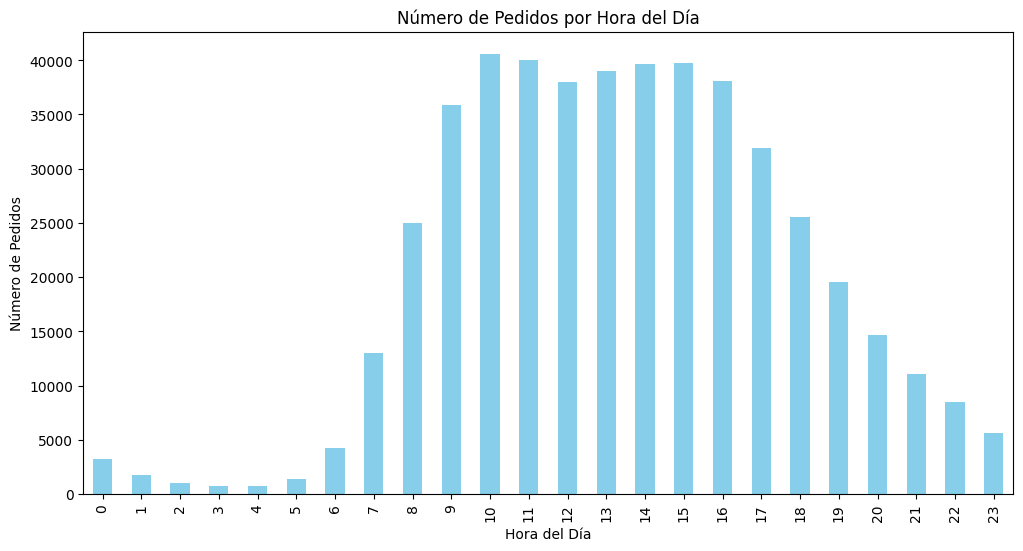

In [37]:
from matplotlib import pyplot as plt
orders_by_hour = df_orders_cleaned['order_hour_of_day'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
orders_by_hour.plot(kind='bar', color='skyblue')

plt.title('Número de Pedidos por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Pedidos')
plt.xticks(range(24))

plt.show()

Escribe aquí tus conclusiones

RESPUESTA: Según el gráfico, se empieza a ver un incremento entre 7 y 8 a.m., llegando al máximo a las 9 a.m., se mantiene "estable" y comienza a bajar a partir de las 5 p.m. 

### [A3] ¿Qué día de la semana compran víveres las personas?

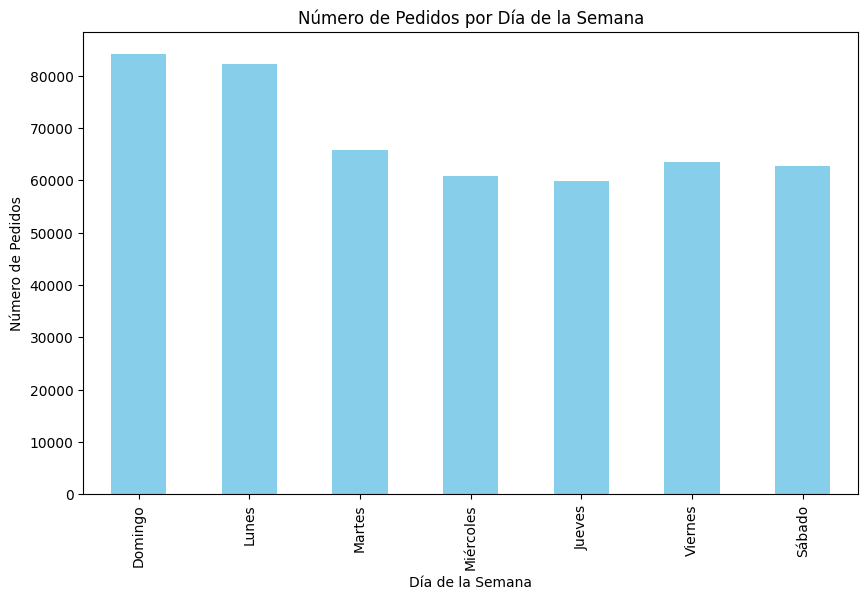

In [38]:
orders_by_dow = df_orders_cleaned['order_dow'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
orders_by_dow.plot(kind='bar', color='skyblue')

plt.title('Número de Pedidos por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Pedidos')
plt.xticks(ticks=range(7), labels=['Domingo', 'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado'])

plt.show()

Escribe aquí tus conclusiones

RESPUESTA: La mayoría de las personas compran los días domingo seguido del lunes.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

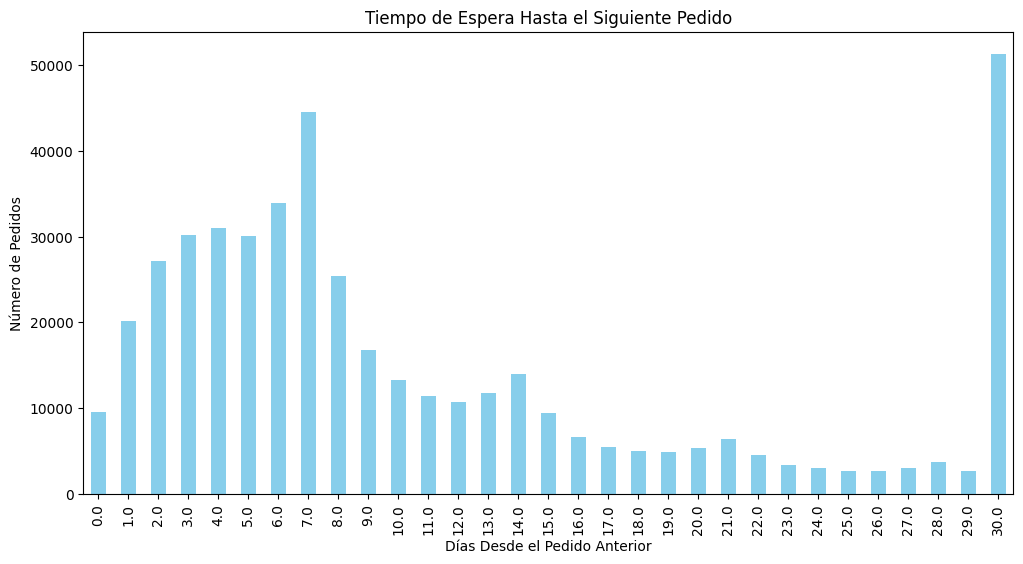

Valor mínimo en 'days_since_prior_order': 0.0 días
Valor máximo en 'days_since_prior_order': 30.0 días


In [39]:
days_since_prior_order_counts = df_orders_cleaned['days_since_prior_order'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
days_since_prior_order_counts.plot(kind='bar', color='skyblue')

plt.title('Tiempo de Espera Hasta el Siguiente Pedido')
plt.xlabel('Días Desde el Pedido Anterior')
plt.ylabel('Número de Pedidos')
plt.xticks(range(len(days_since_prior_order_counts)))

plt.show()

min_days = df_orders_cleaned['days_since_prior_order'].min()
max_days = df_orders_cleaned['days_since_prior_order'].max()

print(f"Valor mínimo en 'days_since_prior_order': {min_days} días")
print(f"Valor máximo en 'days_since_prior_order': {max_days} días")

Escribe aquí tus conclusiones

RESPUESTA: El mínimo tiempo de espera es el mismo día y los que más tardan vuelven a comprar en un mes. Sin embargo, hay una cantidad considerable  de personas que compran dentro de la primera semana.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

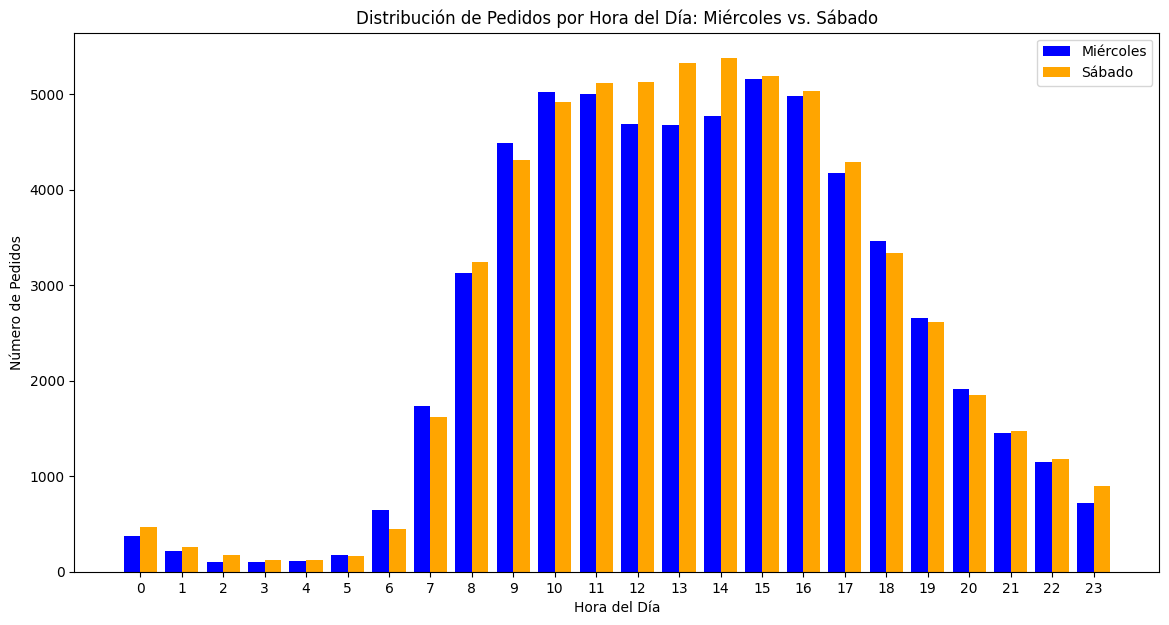

In [40]:
wednesday_orders = df_orders_cleaned[df_orders_cleaned['order_dow'] == 3]
saturday_orders = df_orders_cleaned[df_orders_cleaned['order_dow'] == 6]

wednesday_orders_by_hour = wednesday_orders['order_hour_of_day'].value_counts().sort_index()
saturday_orders_by_hour = saturday_orders['order_hour_of_day'].value_counts().sort_index()

plt.figure(figsize=(14, 7))

plt.bar(wednesday_orders_by_hour.index - 0.2, wednesday_orders_by_hour.values, width=0.4, label='Miércoles', color='blue', align='center')

plt.bar(saturday_orders_by_hour.index + 0.2, saturday_orders_by_hour.values, width=0.4, label='Sábado', color='orange', align='center')

plt.title('Distribución de Pedidos por Hora del Día: Miércoles vs. Sábado')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Pedidos')
plt.xticks(range(24))
plt.legend()

plt.show()


Escribe aquí tus conclusiones

RESPUESTA: La distribución de pedidos por hora del día para ambos es muy parecida. El mínimo para el día miércoles es a las 2 a.m., mientras que para el sábado a las 3 a.m. Los máximos son a las 2 y 3 p.m. respectivamente.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

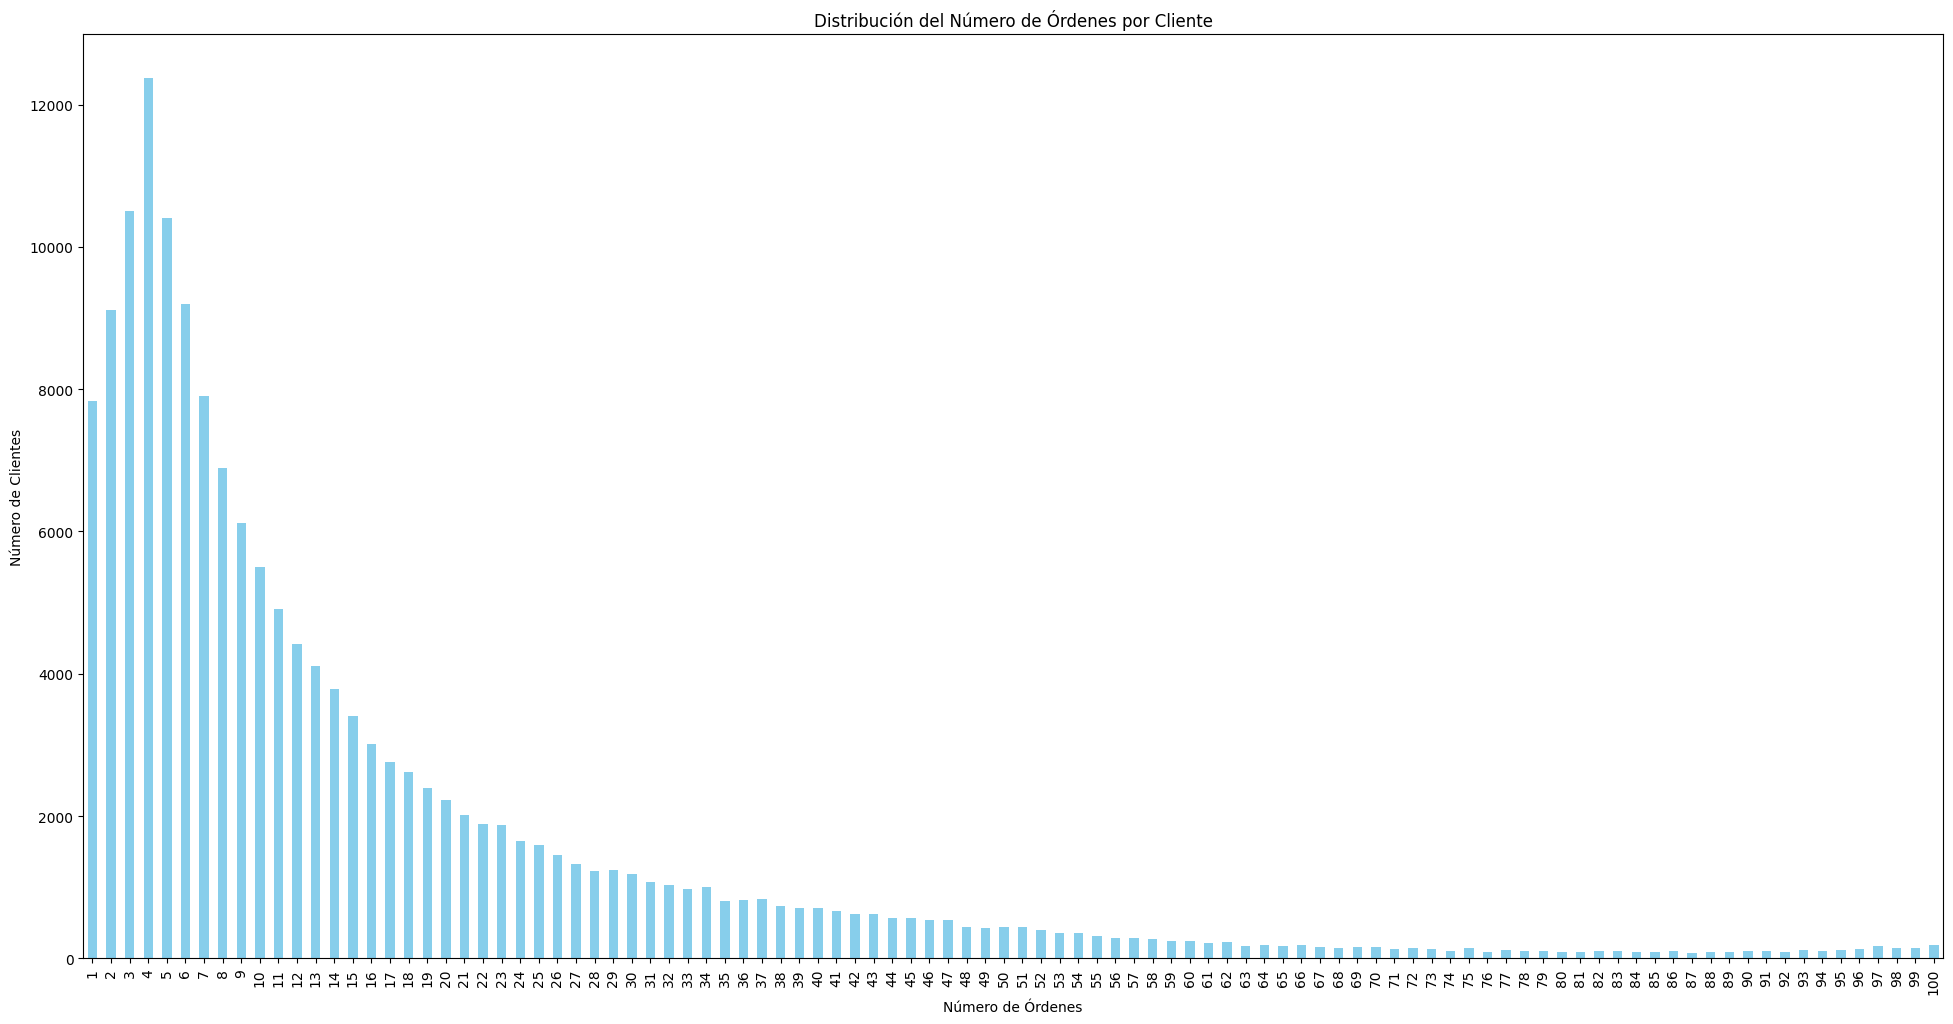

In [41]:
orders_per_customer = df_orders_cleaned.groupby('user_id')['order_number'].max()

orders_distribution = orders_per_customer.value_counts().sort_index()

plt.figure(figsize=(24, 12))
orders_distribution.plot(kind='bar', color='skyblue')

plt.title('Distribución del Número de Órdenes por Cliente')
plt.xlabel('Número de Órdenes')
plt.ylabel('Número de Clientes')

plt.show()

Escribe aquí tus conclusiones

RESPUESTA: El gráfico indica que la mayoría de los clientes ha ordenado 3 veces y mientras aumenta el número de órdenes, disminuye el número de clientes. Dicho de otra manera: entre más grande sea el número de órdenes, menor es la cantidad de clientes que pueden realizarlo.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [42]:
# Contar la frecuencia de cada producto en la tabla order_products
product_counts = df_order_products.groupby('product_id').size().nlargest(20).reset_index(name='frequency')

# Unir con la tabla products para obtener los nombres de los productos
top_products = pd.merge(product_counts, df_products[['product_id', 'product_name']], on='product_id')

# Mostrar los 20 principales productos
print("Los 20 principales productos que se piden con más frecuencia son:")
display(top_products)

Los 20 principales productos que se piden con más frecuencia son:


,product_id,frequency,product_name
0,24852,66050,BANANA
1,13176,53297,BAG OF ORGANIC BANANAS
2,21137,37039,ORGANIC STRAWBERRIES
3,21903,33971,ORGANIC BABY SPINACH
4,47209,29773,ORGANIC HASS AVOCADO
5,47766,24689,ORGANIC AVOCADO
6,47626,21495,LARGE LEMON
7,16797,20018,STRAWBERRIES
8,26209,19690,LIMES
9,27845,19600,ORGANIC WHOLE MILK


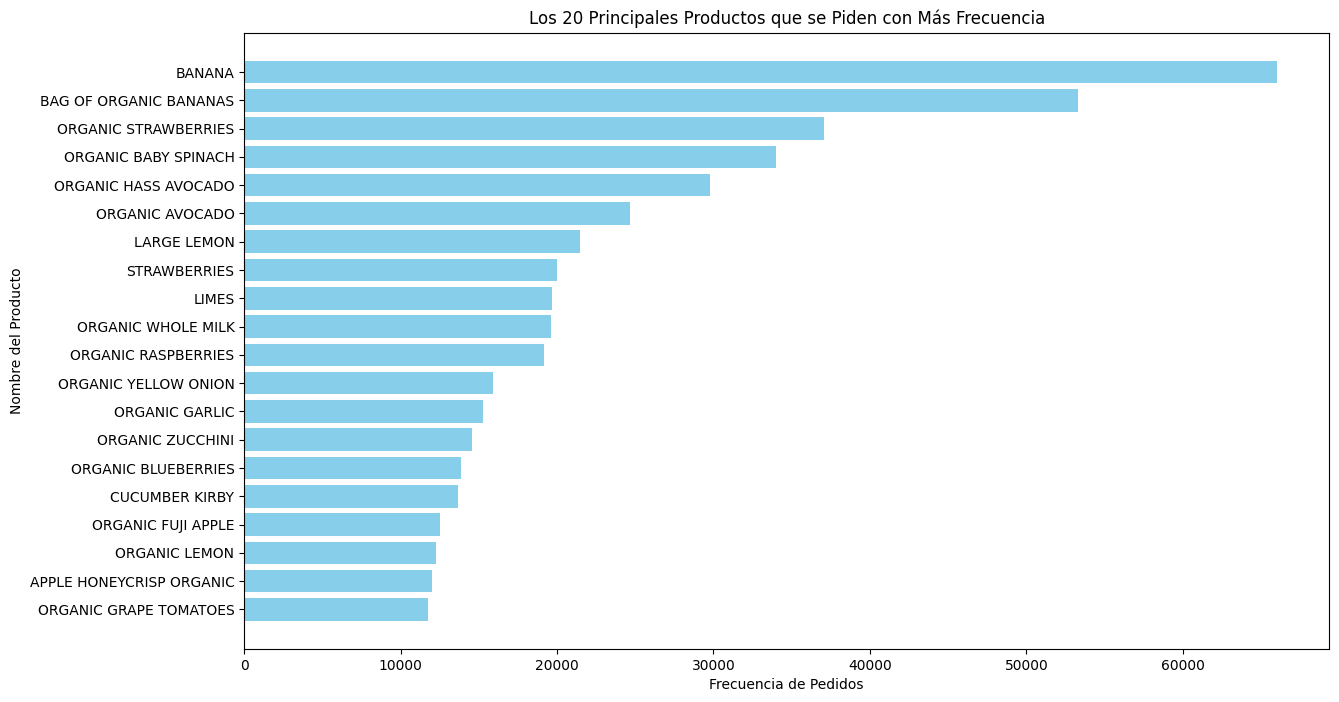

In [43]:
plt.figure(figsize=(14, 8))
plt.barh(top_products['product_name'], top_products['frequency'], color='skyblue')
plt.xlabel('Frecuencia de Pedidos')
plt.ylabel('Nombre del Producto')
plt.title('Los 20 Principales Productos que se Piden con Más Frecuencia')
plt.gca().invert_yaxis()  # Invertir el eje Y para que el producto más frecuente aparezca primero

plt.show()

Escribe aquí tus conclusiones

RESPUESTA: Los productos más comprados son las frutas.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
dtype: float64


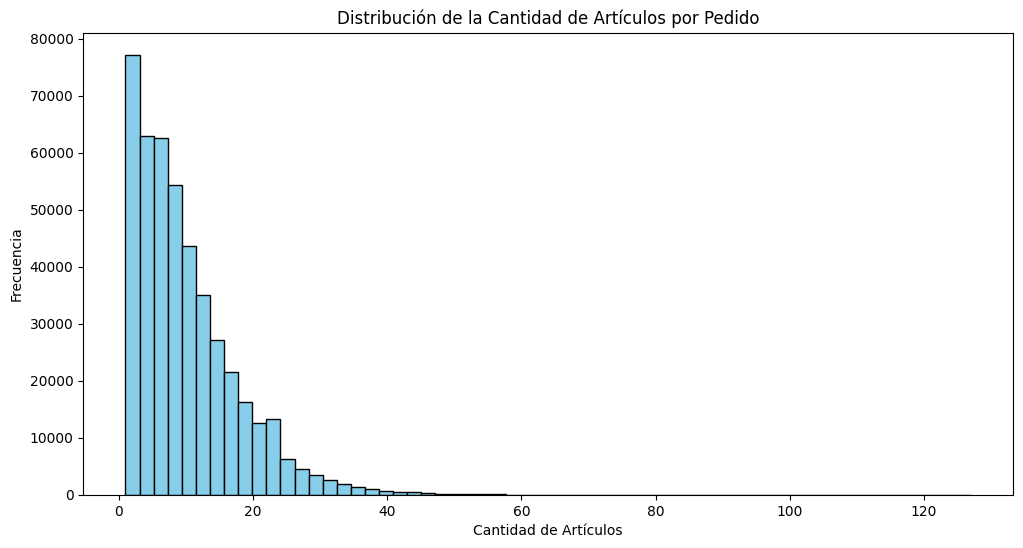

In [44]:
products_per_order = df_order_products.groupby('order_id').size()

order_stats = products_per_order.describe()
print(order_stats)

plt.figure(figsize=(12, 6))
plt.hist(products_per_order, bins=60, color='skyblue', edgecolor='black')
plt.title('Distribución de la Cantidad de Artículos por Pedido')
plt.xlabel('Cantidad de Artículos')
plt.ylabel('Frecuencia')
plt.show()

Escribe aquí tus conclusiones

RESPUESTA: Viendo la distribución del gráfico, yo tomaría el percentil 25 como referencia, dando como resultado que comprar normalmente 5 artículos.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [45]:
reordered_products = df_order_products[df_order_products['reordered'] == 1]
reordered_counts = reordered_products['product_id'].value_counts().head(20).reset_index()
reordered_counts.columns = ['product_id', 'frequency']
top_reordered_products = pd.merge(reordered_counts, df_products[['product_id', 'product_name']], on='product_id')

print("Los 20 principales artículos que se vuelven a pedir con mayor frecuencia son:")
display(top_reordered_products[['product_id', 'product_name', 'frequency']])

Los 20 principales artículos que se vuelven a pedir con mayor frecuencia son:


,product_id,product_name,frequency
0,24852,BANANA,55763
1,13176,BAG OF ORGANIC BANANAS,44450
2,21137,ORGANIC STRAWBERRIES,28639
3,21903,ORGANIC BABY SPINACH,26233
4,47209,ORGANIC HASS AVOCADO,23629
5,47766,ORGANIC AVOCADO,18743
6,27845,ORGANIC WHOLE MILK,16251
7,47626,LARGE LEMON,15044
8,27966,ORGANIC RASPBERRIES,14748
9,16797,STRAWBERRIES,13945


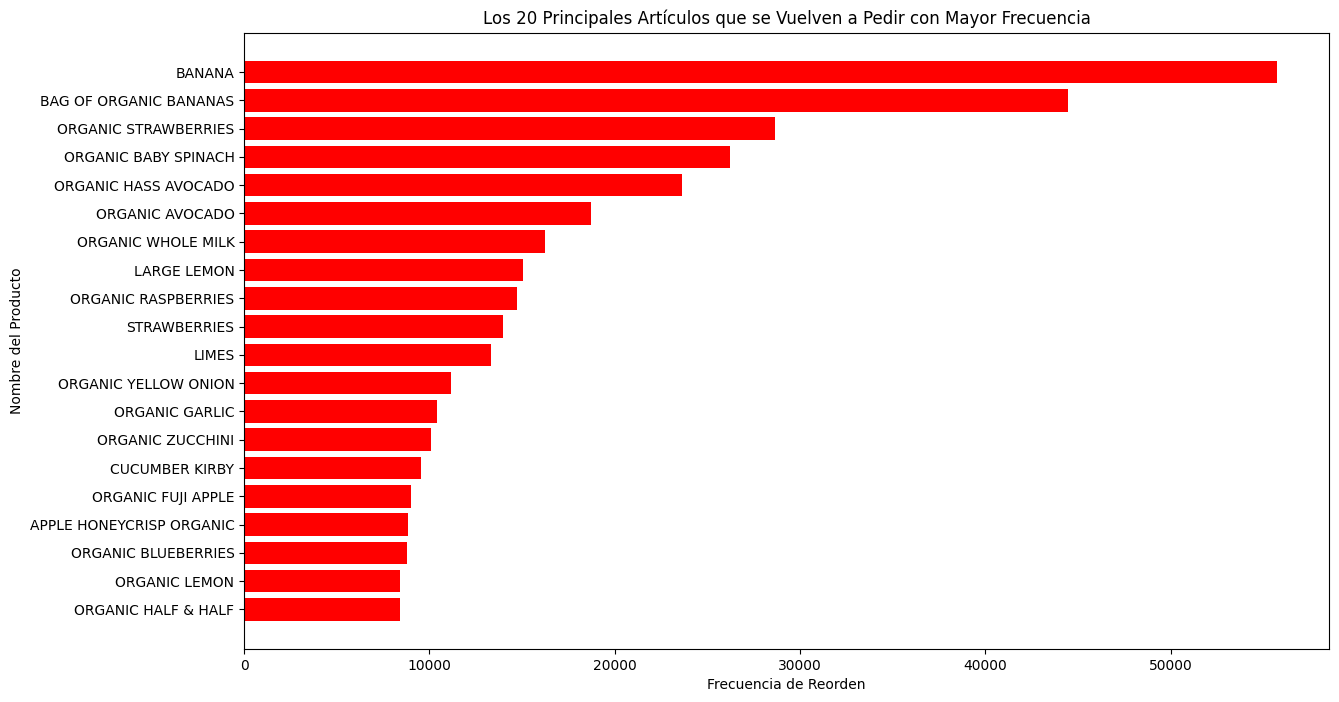

In [46]:
plt.figure(figsize=(14, 8))
plt.barh(top_reordered_products['product_name'], top_reordered_products['frequency'], color='red')
plt.xlabel('Frecuencia de Reorden')
plt.ylabel('Nombre del Producto')
plt.title('Los 20 Principales Artículos que se Vuelven a Pedir con Mayor Frecuencia')
plt.gca().invert_yaxis()  

plt.show()

Escribe aquí tus conclusiones

RESPUESTA: Coinciden mucho las tablas de los pedidos más populares y los reordenados.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [47]:
total_orders = df_order_products.groupby('product_id').size().reset_index(name='total_orders')
repeated_orders = df_order_products[df_order_products['reordered'] == 1].groupby('product_id').size().reset_index(name='reordered_orders')
repetition_rate = pd.merge(total_orders, repeated_orders, on='product_id', how='left')
repetition_rate['reordered_orders'] = repetition_rate['reordered_orders'].fillna(0)
repetition_rate['repetition_rate'] = repetition_rate['reordered_orders'] / repetition_rate['total_orders']
repetition_rate = pd.merge(repetition_rate, df_products[['product_id', 'product_name']], on='product_id')
display(repetition_rate[['product_id', 'product_name', 'total_orders', 'reordered_orders', 'repetition_rate']])


,product_id,product_name,total_orders,reordered_orders,repetition_rate
0,1,CHOCOLATE SANDWICH COOKIES,280,158.0,0.564286
1,2,ALL-SEASONS SALT,11,0.0,0.000000
2,3,ROBUST GOLDEN UNSWEETENED OOLONG TEA,42,31.0,0.738095
3,4,SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...,49,25.0,0.510204
4,7,PURE COCONUT WATER WITH ORANGE,2,1.0,0.500000
...,...,...,...,...,...
45568,49690,HIGH PERFORMANCE ENERGY DRINK,5,4.0,0.800000
45569,49691,ORIGINAL PANCAKE & WAFFLE MIX,72,31.0,0.430556
45570,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,12,5.0,0.416667
45571,49693,SPRING WATER BODY WASH,25,11.0,0.440000


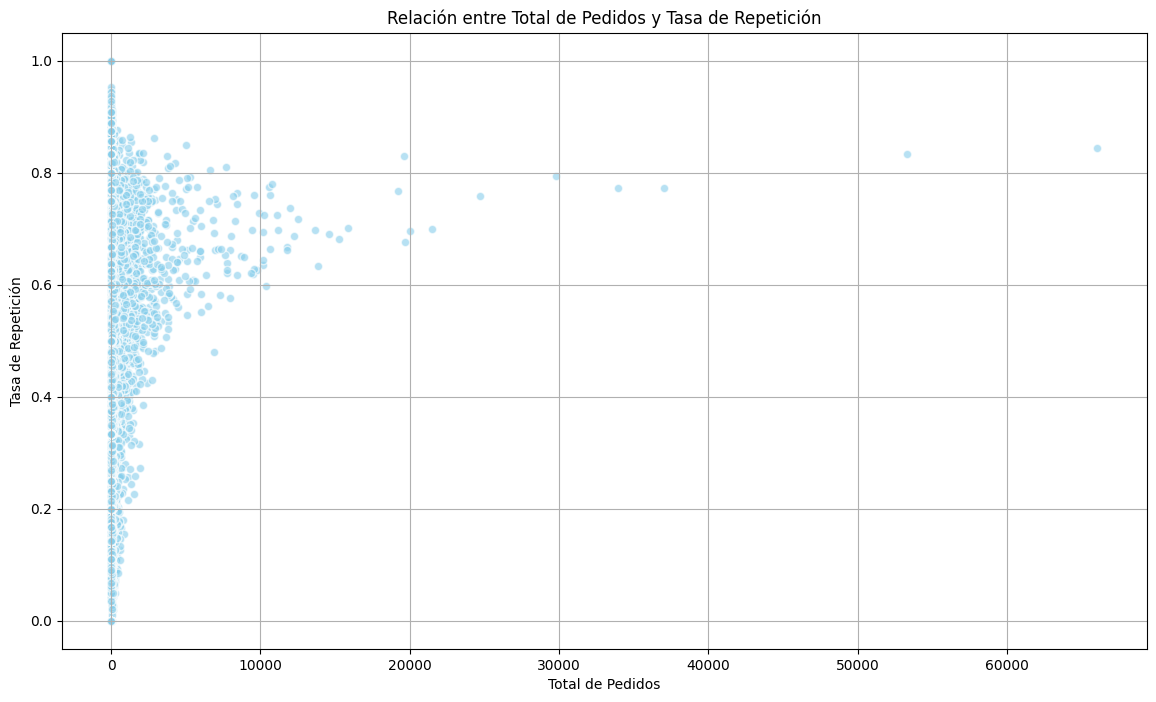

In [48]:
repetition_rate_sorted = repetition_rate.sort_values(by='repetition_rate', ascending=False).head(20)

plt.figure(figsize=(14, 8))
plt.scatter(repetition_rate['total_orders'], repetition_rate['repetition_rate'], alpha=0.6, edgecolors='w', color='skyblue')

plt.xlabel('Total de Pedidos')
plt.ylabel('Tasa de Repetición')
plt.title('Relación entre Total de Pedidos y Tasa de Repetición')
plt.grid(True)

plt.show()


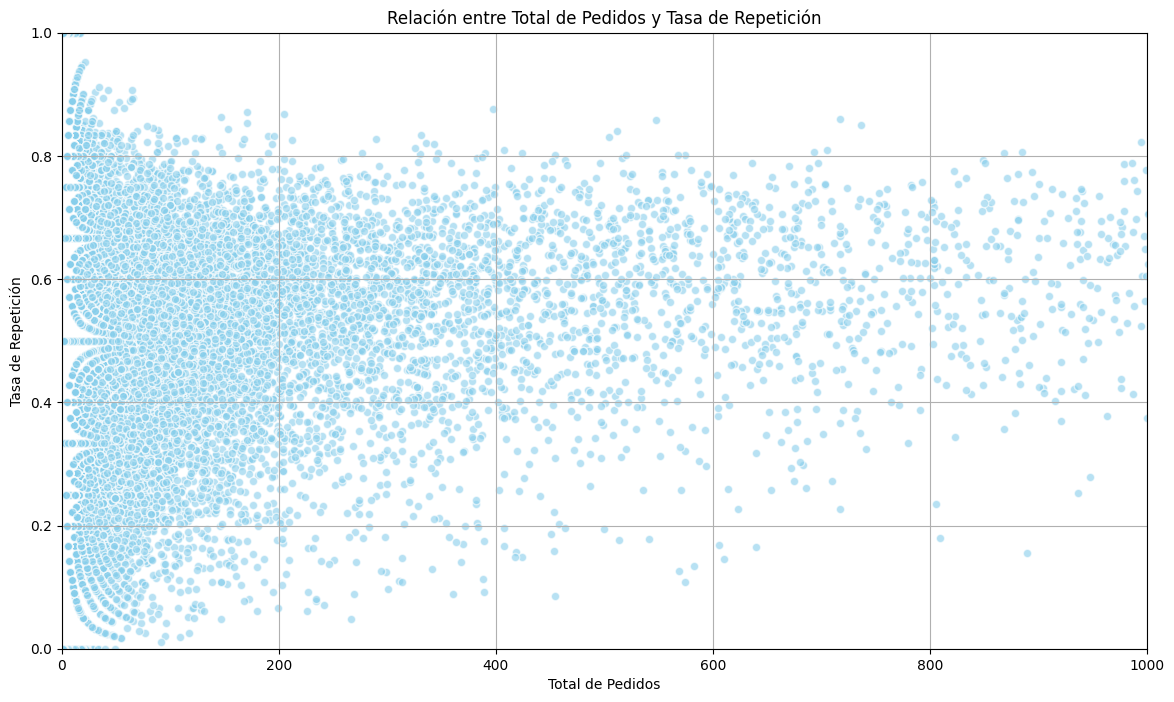

In [49]:
plt.figure(figsize=(14, 8))
plt.scatter(repetition_rate['total_orders'], repetition_rate['repetition_rate'], alpha=0.6, edgecolors='w', color='skyblue')

# Etiquetas y título
plt.xlabel('Total de Pedidos')
plt.ylabel('Tasa de Repetición')
plt.title('Relación entre Total de Pedidos y Tasa de Repetición')
plt.grid(True)

# Ajustar los límites de los ejes
plt.xlim(0, 1000)
plt.ylim(0, 1)

# Mostrar el gráfico
plt.show()

Escribe aquí tus conclusiones

RESPUESTA:
TOTAL DE PEDIDOS: La mayoría de los productos tienen un total de pedidos que varía entre 0 y 1000. Esto indica que la gran mayoría de los productos no son extremadamente populares en términos de número total de pedidos.

DISTRIBUCIÓN: Esta distribución sugiere que hay muchos productos que se piden con menor frecuencia, mientras que solo unos pocos productos son pedidos en grandes cantidades.

TASA DE REPETICIÓN: La tasa de repetición entre 0 y 1 indica que los productos tienen diversas tasas de repetición, desde productos que nunca se repiten (tasa de 0) hasta productos que siempre se repiten (tasa de 1).

PATRONES DE REORDEN: Este rango de valores sugiere que algunos productos tienen clientes muy fieles que los vuelven a pedir regularmente, mientras que otros productos son comprados menos frecuentemente.

PRODUCTOS POPULARES NO SIEMPRE REORDENADOS: Algunos productos pueden ser populares en términos de número total de pedidos, pero no necesariamente tienen una alta tasa de repetición. Esto podría indicar que son productos de compra única o que los clientes no los consideran imprescindibles para reordenar.

PRODUCTOS DE ALTA TASA DE REPETICIÓN: Los productos que están cerca del valor de 1 en el eje Y son aquellos que los clientes tienden a reordenar con mayor frecuencia. Esto podría ser indicativo de productos esenciales o de alta satisfacción.

COMPORTAMIENTOS DE COMPRA: La distribución de los puntos muestra una variedad de comportamientos de compra. No todos los productos se comportan de la misma manera en términos de total de pedidos y tasa de repetición, lo cual refleja la diversidad en las preferencias y necesidades de los clientes.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [50]:
df_merged_orders_orders = pd.merge(df_order_products, df_orders_cleaned[['order_id', 'user_id']], on='order_id')
total_products_per_user = df_merged_orders_orders.groupby('user_id').size().reset_index(name='total_products')
repeated_products_per_user = df_merged_orders_orders[df_merged_orders_orders['reordered'] == 1].groupby('user_id').size().reset_index(name='repeated_products')
user_repetition_rate = pd.merge(total_products_per_user, repeated_products_per_user, on='user_id', how='left')
user_repetition_rate['repeated_products'] = user_repetition_rate['repeated_products'].fillna(0)
user_repetition_rate['repetition_rate'] = user_repetition_rate['repeated_products'] / user_repetition_rate['total_products']
display(user_repetition_rate[['user_id', 'total_products', 'repeated_products', 'repetition_rate']])

,user_id,total_products,repeated_products,repetition_rate
0,2,26,1.0,0.038462
1,4,2,0.0,0.000000
2,5,12,8.0,0.666667
3,6,4,0.0,0.000000
4,7,14,13.0,0.928571
...,...,...,...,...
149621,206203,27,6.0,0.222222
149622,206206,21,15.0,0.714286
149623,206207,46,41.0,0.891304
149624,206208,125,87.0,0.696000


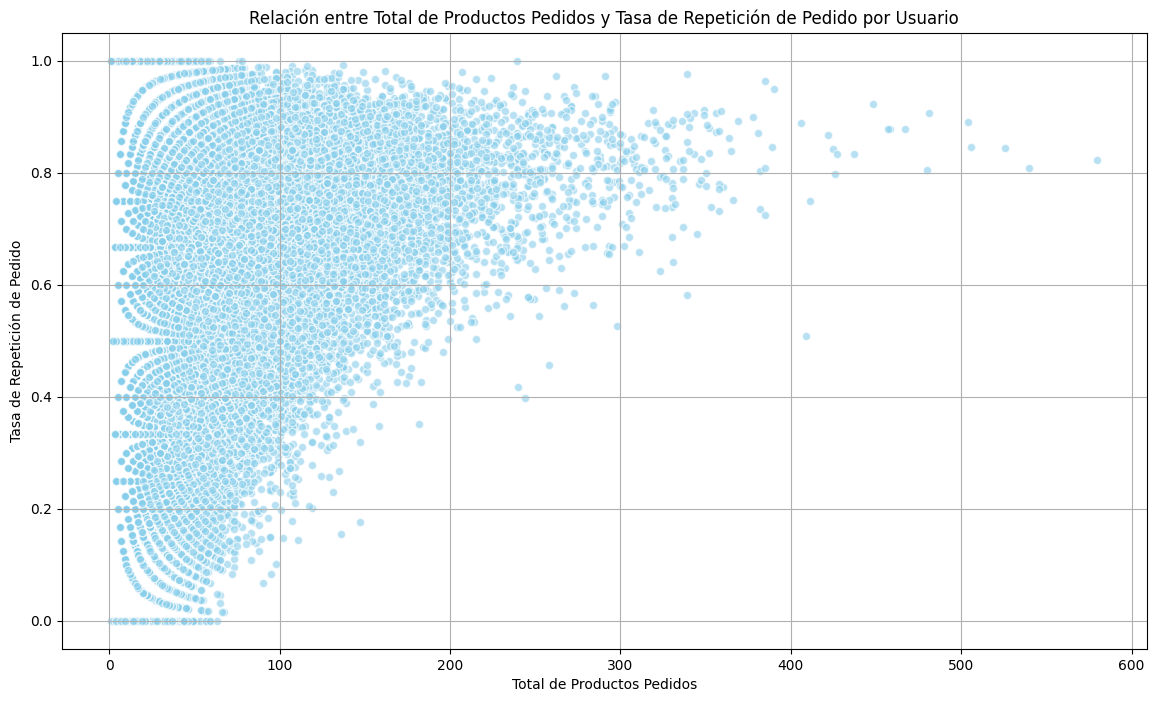

In [51]:
plt.figure(figsize=(14, 8))
plt.scatter(user_repetition_rate['total_products'], user_repetition_rate['repetition_rate'], alpha=0.6, edgecolors='w', color='skyblue')

plt.xlabel('Total de Productos Pedidos')
plt.ylabel('Tasa de Repetición de Pedido')
plt.title('Relación entre Total de Productos Pedidos y Tasa de Repetición de Pedido por Usuario')
plt.grid(True)

plt.show()


Escribe aquí tus conclusiones

RESPUESTA: La mayoría de sus productos ya los ha comprado con anterioridad.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [52]:
first_in_cart = df_order_products[df_order_products['add_to_cart_order'] == 1]
first_in_cart_counts = first_in_cart['product_id'].value_counts().head(20).reset_index()
first_in_cart_counts.columns = ['product_id', 'times_first_in_cart']
top_first_in_cart_products = pd.merge(first_in_cart_counts, df_products[['product_id', 'product_name']], on='product_id')

print("Los 20 principales artículos que la gente pone primero en sus carritos son:")
display(top_first_in_cart_products[['product_id', 'product_name', 'times_first_in_cart']])


Los 20 principales artículos que la gente pone primero en sus carritos son:


,product_id,product_name,times_first_in_cart
0,24852,BANANA,15562
1,13176,BAG OF ORGANIC BANANAS,11026
2,27845,ORGANIC WHOLE MILK,4363
3,21137,ORGANIC STRAWBERRIES,3946
4,47209,ORGANIC HASS AVOCADO,3390
5,21903,ORGANIC BABY SPINACH,3336
6,47766,ORGANIC AVOCADO,3044
7,19660,SPRING WATER,2336
8,16797,STRAWBERRIES,2308
9,27966,ORGANIC RASPBERRIES,2024


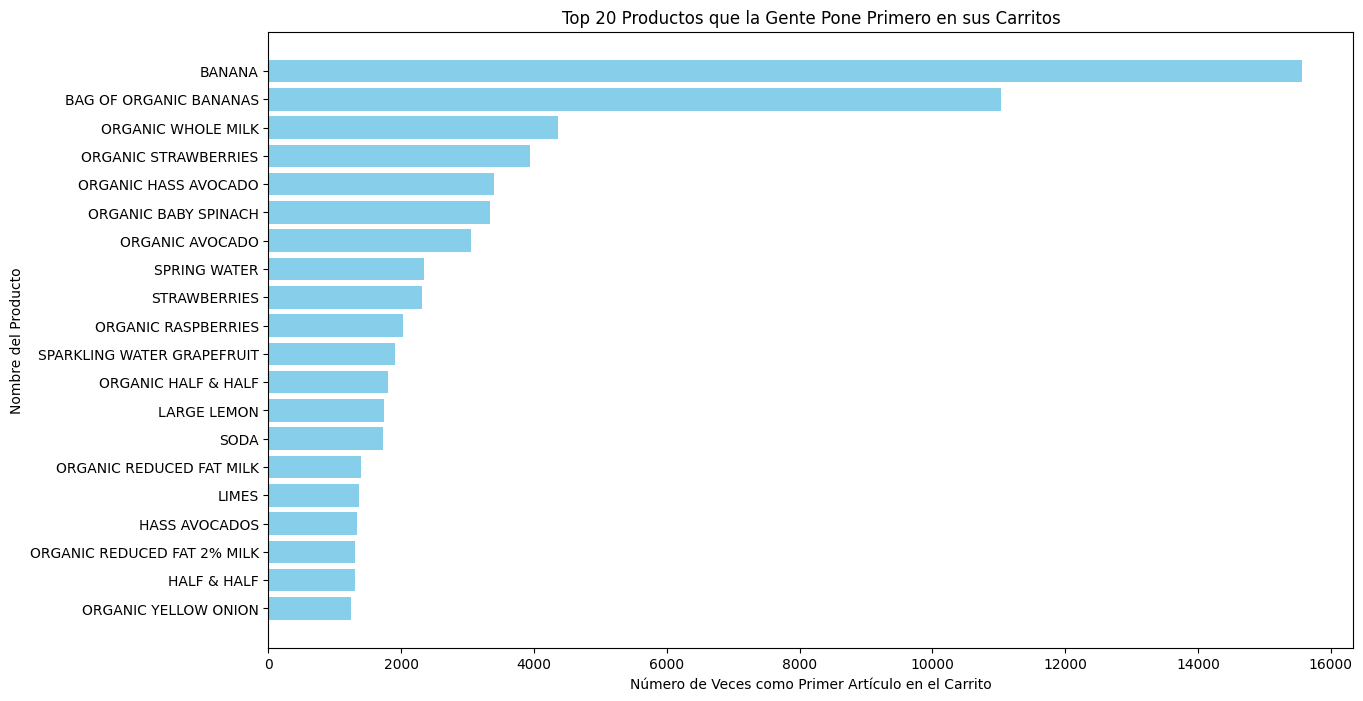

In [53]:
# Crear el gráfico de barras horizontal
plt.figure(figsize=(14, 8))
plt.barh(top_first_in_cart_products['product_name'], top_first_in_cart_products['times_first_in_cart'], color='skyblue')
plt.xlabel('Número de Veces como Primer Artículo en el Carrito')
plt.ylabel('Nombre del Producto')
plt.title('Top 20 Productos que la Gente Pone Primero en sus Carritos')
plt.gca().invert_yaxis()  # Invertir el eje Y para que el producto más frecuente aparezca primero

# Mostrar el gráfico
plt.show()


Escribe aquí tus conclusiones

RESPUESTA: En conclusión, por lo que se muestra en el gráfico, los clientes ponen en su carrito primero las frutas y verduras.

### Conclusion general del proyecto:


ESTRATEGIAS DE RETENCIÓN Y FIDELIZACIÓN:
Dado que ciertos productos tienen altas tasas de repetición y son frecuentemente reordenados, se recomienda enfocar las estrategias de retención y fidelización en estos productos.
Programas de recompensas y promociones dirigidas a estos productos pueden aumentar la lealtad del cliente.

OPTIMIZACIÓN DE INVENTARIO:
Conociendo los productos que son añadidos primero al carrito y los más reordenados, se puede optimizar el inventario para asegurar que estos productos estén siempre disponibles.
Esto puede ayudar a mejorar la satisfacción del cliente y reducir la pérdida de ventas por falta de stock.

MEJORA DE LA EXPERIENCIA DEL CLIENTE:
Entender los patrones de compra y las preferencias de los clientes permite personalizar la experiencia de compra.
Herramientas de recomendación basadas en el historial de pedidos y la tasa de repetición pueden ofrecer sugerencias más relevantes y mejorar la experiencia del cliente.

Este proyecto ha proporcionado una visión integral de los patrones de compra y las preferencias de los clientes, destacando la importancia de ciertos productos en la lealtad y satisfacción del cliente. Al aplicar las recomendaciones derivadas de este análisis, las estrategias de retención, optimización de inventario y mejora de la experiencia del cliente pueden ser significativamente mejoradas.